In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import pickle
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy', 'baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'])

stopwords = list_stopwords

In [12]:
stopwords[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [13]:
data = pd.read_csv('hasil_processing.csv')
data.head()

,full_text,username,huruf_kecil,cleaning,tokenizing,filtering,stemming
0,Queen Bee Syndrome Iriana Penyebab Runtuhnya K...,hnirankara,queen bee syndrome iriana penyebab runtuhnya k...,queen bee syndrome iriana penyebab runtuhnya k...,"['queen', 'bee', 'syndrome', 'iriana', 'penyeb...","['queen', 'bee', 'syndrome', 'iriana', 'penyeb...","['queen', 'bee', 'syndrome', 'iriana', 'sebab'..."
1,Gibran pulang ke Solo Jumat siang Jokowi malam...,ZAEffendy,gibran pulang ke solo jumat siang jokowi malam...,gibran pulang ke solo jumat siang jokowi malam...,"['gibran', 'pulang', 'ke', 'solo', 'jumat', 's...","['gibran', 'pulang', 'solo', 'jumat', 'siang',...","['gibran', 'pulang', 'solo', 'jumat', 'siang',..."
2,Mau lengser Jokowi masih resmikan Istana di I...,AnKiiim_,mau lengser jokowi masih resmikan istana di i...,mau lengser jokowi masih resmikan istana di ik...,"['mau', 'lengser', 'jokowi', 'masih', 'resmika...","['lengser', 'jokowi', 'resmikan', 'istana', 'i...","['lengser', 'jokowi', 'resmi', 'istana', 'ikn'..."
3,#TempoThread Dalam momen mendebarkan menjelang...,tempodotco,#tempothread dalam momen mendebarkan menjelang...,dalam momen mendebarkan menjelang pensiun joko...,"['dalam', 'momen', 'mendebarkan', 'menjelang',...","['momen', 'mendebarkan', 'menjelang', 'pensiun...","['momen', 'debar', 'jelang', 'pensiun', 'jokow..."
4,MAHASISWA JAKET KUNING KEPUNG DPR TOLAK GIBRAN...,herculep638,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...,"['mahasiswa', 'jaket', 'kuning', 'kepung', 'dp...","['mahasiswa', 'jaket', 'kuning', 'kepung', 'dp...","['mahasiswa', 'jaket', 'kuning', 'kepung', 'dp..."


In [14]:
data.isna().sum()

data = data.dropna(subset=["cleaning"])
data.isna().sum()


full_text      0
username       0
huruf_kecil    0
cleaning       0
tokenizing     0
filtering      0
stemming       0
dtype: int64

In [15]:
data = data.cleaning.to_list()

In [16]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data)

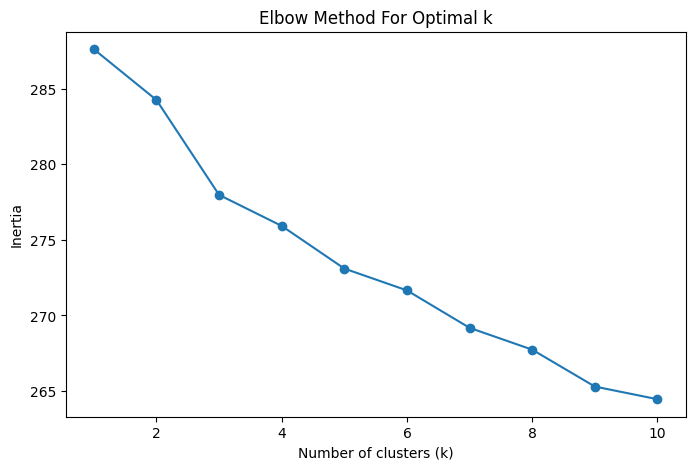

In [28]:
# List to hold the inertia values for each k
inertia_values = []

# Loop over a range of cluster numbers from 1 to 30
for k in range(1, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    model.fit(X)
    
    # Append the inertia (sum of squared distances to the nearest cluster center)
    inertia_values.append(model.inertia_)

# Plot the inertia to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=true_k)
model.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=5)

In [39]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 jokowi
 gibran
 presiden
 fufufafa
 prabowo
 anak
 keluarga
 terpilih
 akun
 kaesang

Cluster 1:
 indonesia
 tweet
 hots
 rp
 bisseck
 presiden
 kerja
 jokowi
 infrastruktur
 pembangunan

Cluster 2:
 prabowogibran
 pelantikan
 jokowi
 presiden
 hadiri
 hadir
 prabowo
 kabinet
 menang
 acara

Cluster 3:
 pekan
 gtgt
 ujung
 tanduk
 youtube
 menghitung
 ilc
 demo
 tonton
 selengkapnya

Cluster 4:
 prabowo
 solo
 gibran
 jokowi
 bertemu
 siang
 makan
 presiden
 rakabuming
 pertemuan



In [40]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

np.float64(0.018743114050280354)

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

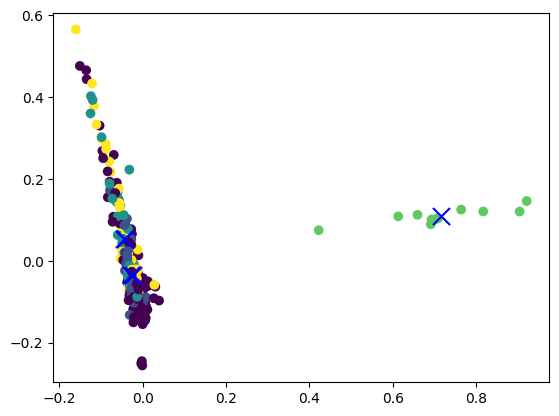

In [42]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')